# <font color = "green">Reading the data </font>

In [ ]:
import pandas as pd
import os

print(os.getcwd())
os.listdir()
dt = pd.read_excel('oil  pricesdata Edited.xlsx')
dt.head()

# <font color = "darkred"> Data cleaning </font>

In [6]:
dt.tail()

,.;,Date,Price Per Barell,Exrates,PMS,AGO,Kero,Average_price_crude,Price_oil_internationally
133,134,14/01/2022,82.73,113.14,129.72,110.6,103.54,114.620000,58.873083
134,135,14/02/2022,82.03,113.58,129.72,110.6,103.54,114.620000,58.601962
135,136,14/03/2022,74.36,113.79,134.72,115.6,103.54,117.953333,53.220758
136,137,14/04/2022,93.99,114.40,144.62,125.5,113.44,127.853333,67.630914
137,138,14/05/2022,112.48,115.50,150.12,131.0,118.94,133.353333,81.713699


In [8]:
dt.shape

(138, 9)

In [10]:
# column dtypes
dt['Date'] = pd.DatetimeIndex(dt['Date'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   .;                         138 non-null    int64         
 1   Date                       138 non-null    datetime64[ns]
 2   Price Per Barell           138 non-null    float64       
 3   Exrates                    138 non-null    float64       
 4   PMS                        138 non-null    float64       
 5   AGO                        138 non-null    float64       
 6   Kero                       138 non-null    float64       
 7   Average_price_crude        138 non-null    float64       
 8   Price_oil_internationally  138 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.8 KB


In [13]:
dt['Month']= [i.month_name() for i in dt['Date']]
dt.head()

,.;,Date,Price Per Barell,Exrates,PMS,AGO,Kero,Average_price_crude,Price_oil_internationally,Month
0,0,2010-01-14,89.15,80.568005,94.03,87.45,75.83,85.770000,45.177431,January
1,1,2011-01-14,89.17,81.029071,95.67,88.71,77.51,87.296667,45.446162,January
2,2,2011-02-14,88.58,81.473400,98.08,91.72,79.52,89.773333,45.393022,February
3,3,2011-03-14,102.86,84.205509,102.44,94.53,83.97,93.646667,54.478433,March
4,4,2011-04-14,109.53,83.889816,111.17,107.52,90.91,103.200000,57.793621,April


In [18]:
print(dt.columns)
# dt1 = dt.drop(['.;'])
# dt1.head(2)\
dt1  = dt.iloc[:,1:]
dt1.head()

Index(['.;', 'Date', 'Price Per Barell', 'Exrates', 'PMS', 'AGO', 'Kero',
       'Average_price_crude', 'Price_oil_internationally', 'Month'],
      dtype='object')


,Date,Price Per Barell,Exrates,PMS,AGO,Kero,Average_price_crude,Price_oil_internationally,Month
0,2010-01-14,89.15,80.568005,94.03,87.45,75.83,85.770000,45.177431,January
1,2011-01-14,89.17,81.029071,95.67,88.71,77.51,87.296667,45.446162,January
2,2011-02-14,88.58,81.473400,98.08,91.72,79.52,89.773333,45.393022,February
3,2011-03-14,102.86,84.205509,102.44,94.53,83.97,93.646667,54.478433,March
4,2011-04-14,109.53,83.889816,111.17,107.52,90.91,103.200000,57.793621,April


In [20]:
dt1.isnull().sum()

Date                         0
Price Per Barell             0
Exrates                      0
PMS                          0
AGO                          0
Kero                         0
Average_price_crude          0
Price_oil_internationally    0
Month                        0
dtype: int64

In [25]:
# nulls  -  fill them with some number based on sum assumptions (imputation)
# drop the nulls

dt1.describe()

,Date,Price Per Barell,Exrates,PMS,AGO,Kero,Average_price_crude,Price_oil_internationally
count,138,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2016-08-26 13:02:36.521739008,70.756014,97.766151,108.358478,97.701377,81.371667,95.813261,42.637282
min,2010-01-14 00:00:00,17.640000,80.568005,80.710000,65.700000,39.620000,63.633333,11.835910
25%,2013-10-21 18:00:00,50.660000,87.457382,99.715000,88.710000,66.432500,85.510000,32.594994
50%,2016-08-29 12:00:00,67.755000,101.171608,109.390000,101.935000,83.380000,99.048333,43.852665
75%,2019-07-06 12:00:00,93.142500,103.541712,115.160000,106.045000,94.305000,104.532500,51.719622
max,2022-05-14 00:00:00,112.480000,115.500000,150.120000,131.000000,118.940000,133.353333,81.713699
std,NaN,22.519599,9.301148,12.587648,12.191943,17.008631,13.384107,11.484658


# <font color = "cyan">EDA ( exploratory data analysis) </font>

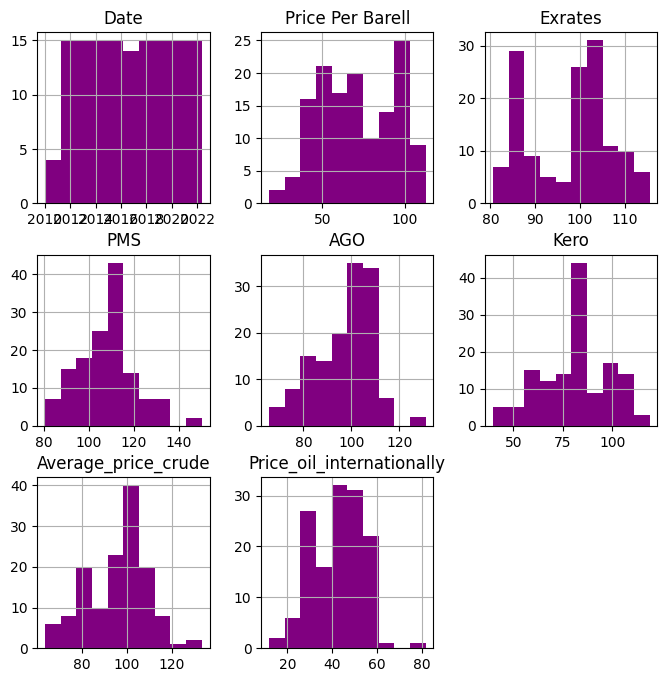

In [24]:
import matplotlib.pyplot as plt
dt1.head()
# univariate  eda /analysis
dt1.hist(figsize = (8,8),color = "purple")
plt.show()

<Axes: ylabel='count'>

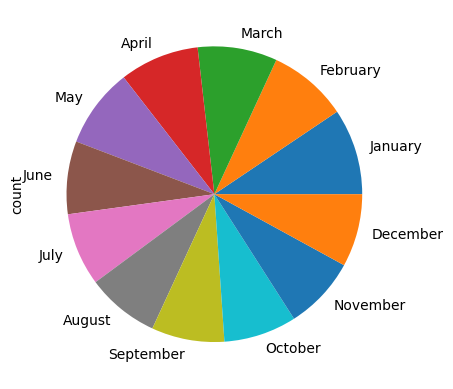

In [30]:
dt1['Month'].value_counts().plot(kind = "pie")